## Imports

In [ ]:
%matplotlib inline

import os
import utils
import re
import nltk
import json
import gensim
import utils
import dateutil
import scipy as sp
import numpy as np
import lightgbm as lgb
import pandas as pd
import seaborn as sns
import xgboost as xgb
from utils import metrics
# import advertools as adv
from scipy import sparse
from functools import reducec
from datetime import datetime
from utils import clean_dataset
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn import preprocessing
from IPython.display import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from textblob import TextBlob
from functools import reduce
from nltk.corpus import stopwords
from typing import List, Callable, Dict
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
sns.set(style="ticks", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import featureScore
from utils import folderPath
from utils import metrics
from utils import removeColumnContainString
from utils import Feature_Extraction
from utils import Normalizing
import sys

random_state=2022

In [ ]:
figurePath=utils.folderPath('SavedFigures')
datasetePath=utils.folderPath('Dataset')  

1
1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset1='/content/drive/MyDrive/NLP/'

In [ ]:
extracted=pd.read_csv(dataset1 + '3.csv')

In [ ]:
extracted

,Unnamed: 0,caption,following,likes,posts_count,followers,caption_length,biography_length,po_co,pof,...,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,hashtag_popularity
0,0,last pizza sunday arch today pizzas available ...,352.0,29.0,280.0,8702.0,121,149.0,280.0,0.793201,...,0.233333,0.200000,NaN,0,NaN,0,"['🍕', '🍕', '🍕', '🥐', '🥐', '🥐']","'pizza', 'pizza', 'pizza', 'croissant', 'crois...",6,0.000000
1,1,new cakes counters,352.0,44.0,280.0,8702.0,28,149.0,280.0,0.793201,...,0.454545,0.136364,NaN,0,NaN,0,"['😋', '😋']","'face savoring food', 'face savoring food'",2,0.000000
2,2,opening times half term hi everyone wanted let...,352.0,209.0,280.0,8702.0,259,149.0,28.0,0.793201,...,0.147222,-0.080556,NaN,0,NaN,0,"['🔺', '🔺']","'red triangle pointed up', 'red triangle point...",2,0.000000
3,3,new addition selection sandwiches roasted aube...,352.0,95.0,280.0,8702.0,138,149.0,70.0,0.793201,...,0.477273,0.085227,NaN,0,NaN,0,[],NaN,0,0.000000
4,4,currently closed move new exciting space aroun...,352.0,101.0,280.0,8702.0,256,149.0,40.0,0.793201,...,0.444719,0.174416,"'#yeastbakery', '#eastlondon', '#eastlondonfoo...",4,NaN,0,[],NaN,0,18028.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,88509,day 2 christmas ochure tour day one ochure tour #,579.0,10.0,1863.0,2321.0,278,150.0,931.5,3.212069,...,0.000000,0.000000,"'#sandysfishmongers', '#butcher', '#fishmonger...",20,NaN,0,[],NaN,0,10095.150000
88510,88510,NaN,579.0,50.0,1863.0,2321.0,35,150.0,1863.0,3.212069,...,0.000000,0.000000,"'#armisticeday', '#poppy', '#lestwerespect'",3,NaN,0,[],NaN,0,4333.666667
88511,88511,theres one turkey best place buy sandys make c...,579.0,8.0,1863.0,2321.0,266,150.0,1863.0,3.212069,...,0.525000,0.500000,"'#notjustafishmonger', '#butcher', '#fishmonge...",9,NaN,0,[],NaN,0,5195.444444
88512,88512,day one ochure tour #,579.0,9.0,1863.0,2321.0,241,150.0,1863.0,3.212069,...,0.000000,0.000000,"'#sandysfishmongers', '#butcher', '#fishmonger...",19,NaN,0,[],NaN,0,10504.315789


In [ ]:
extracted.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [ ]:
extracted=extracted.astype(str)

### TF-IDF

In [ ]:
tfidf_caption=Feature_Extraction(extracted['caption'],4,TfidfVectorizer)
tfidf_caption
print("\n\n\n")
tfidf_hashtags=Feature_Extraction(extracted['hashtags'],3,TfidfVectorizer)
tfidf_hashtags
print("\n\n\n")
tfidf_emoji_text=Feature_Extraction(extracted['emoji_text'],3,TfidfVectorizer)
tfidf_emoji_text
print("\n\n\n")
tfidf_mentions=Feature_Extraction(extracted['mentions'],3,TfidfVectorizer)
tfidf_mentions
print("\n\n\n")
tfidf_dataset = pd.DataFrame(np.hstack((tfidf_caption,tfidf_hashtags,tfidf_emoji_text,tfidf_mentions,extracted)))
tfidf_dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


always amazing available better chocolate christmas class classes coffee enjoy every everyone favourite first fitness friday going great happy little looking members monday month offer people perfect personal please ready start still sunday thank today training weekend workout would years youre






/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


bakery bodybuilding boxing bread breakfast brighton cake cardio chocolate christmas classes cocktails coffee coffeeshop community crossfit davidlloydclubs delicious edinburgh edinburghfood edinburghfoodie edinburghlife exercise f45challenge f45training fatloss fitfam fitness fitnessgoals fitnessjourney fitnessmotivation fitspo food foodie foodies foodphotography goals gymlife gymmotivation health healthy healthylifestyle hiit hotel instafit instafood instagood leeds lifestyle london londonfitness londonfood londonlife londonrestaurants love lunch luxury luxuryhotel manchester motivation muscle nutrition personaltrainer personaltraining puregym restaurant results richmond scotland sheffield shoplocal sourdough sport staycation strength strengthtraining strong supportlocal takeaway teamtraining teddington thegym thegymgroup training transformation travel twickenham vegan weightlifting weightloss wellbeing wellness workout workoutmotivation york






/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


arrow backhand beaming beer beverage biceps black blossom blue boxing button camera check cherry christmas circle clapping claus clinking collision dizzy double down drooling exclamation eyes face fire fist flag flash flexed folded food fork glass glasses glove glowing green grinning hand hands heart hearts index keycap knife left lifting light mark medium mobile oncoming orange party partying person phone pizza pointing police popper raising right running savoring skin small smiling sparkles square star struck sweat tears thumbs tone tree weights white winking with woman yellow






/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


247fitnessfortdunlop alexforman82 andybadco1 binghamriverhouse blackswan_oldstead blok bookingoffice boroughmarket brabo0788 breadaheadbakery bristol_beacon buzzgymhq c4_uk civerinos_slice cjmardon coryg_ coventgardenldn crossfit crossfitgames crossfituk dannystafford_hellagym deepaestheticss deliveroo digmeathome elitefitnessredditch1 foodstorymedialtd freshfitnessfood garywilliams_pt gee_robson gymco_belfast harbour_hotels harrietlangford haxbybakehousedeli haxbybaker heckfieldhomefarm hot2fry hyroxuk jermyn johncareyphoto johngillies123 johnniewalker jre_jeunesrestaurateurs jre_uk_ireland justeat justeatuk justindesouza_photographer justsabrinagali kennethculhane lecochonaveugle liftgymsuk magicmountainapp majestic_aesthetics majestic_aesthetics_clinic majestic_aesthetics_official mama_bross mannionsofhelmsley mark mark_anthony_fox mayfair michelinguide mindbodyuk myzonemoves nutrivend oldcannonbrewery oneldnclub optimumnutrition_uk panattaofficial peakperformanceliverpool prideofbr

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,0.0,0.0,0.477303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2333333333333333,0.2,nan,0,nan,0,"['🍕', '🍕', '🍕', '🥐', '🥐', '🥐']","'pizza', 'pizza', 'pizza', 'croissant', 'crois...",6,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4545454545454545,0.1363636363636363,nan,0,nan,0,"['😋', '😋']","'face savoring food', 'face savoring food'",2,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1472222222222222,-0.0805555555555555,nan,0,nan,0,"['🔺', '🔺']","'red triangle pointed up', 'red triangle point...",2,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4772727272727273,0.0852272727272727,nan,0,nan,0,[],nan,0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4447186147186147,0.1744155844155844,"'#yeastbakery', '#eastlondon', '#eastlondonfoo...",4,nan,0,[],nan,0,18028.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.0,0.0,0.0,0.0,0.0,0.520935,0.0,0.0,0.0,0.0,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",20,nan,0,[],nan,0,10095.15
88510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,"'#armisticeday', '#poppy', '#lestwerespect'",3,nan,0,[],nan,0,4333.666666666667
88511,0.0,0.0,0.0,0.0,0.0,0.356972,0.0,0.0,0.0,0.0,...,0.525,0.5,"'#notjustafishmonger', '#butcher', '#fishmonge...",9,nan,0,[],nan,0,5195.444444444444
88512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",19,nan,0,[],nan,0,10504.315789473683


In [ ]:
print(len(tfidf_dataset.columns))
a=len(tfidf_dataset.columns)-43
print(a)
tfidf_dataset[len(tfidf_dataset.columns)-43]
tfidf_dataset.rename(columns = {a:'likes'}, inplace = True)
df=removeColumnContainString(tfidf_dataset)

365
322
Couldn't covert 320 to float
Couldn't covert 357 to float
Couldn't covert 359 to float
Couldn't covert 361 to float
Couldn't covert 362 to float


In [ ]:
tfidf_dataset

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,0.0,0.0,0.477303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2333333333333333,0.2,nan,0,nan,0,"['🍕', '🍕', '🍕', '🥐', '🥐', '🥐']","'pizza', 'pizza', 'pizza', 'croissant', 'crois...",6,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4545454545454545,0.1363636363636363,nan,0,nan,0,"['😋', '😋']","'face savoring food', 'face savoring food'",2,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1472222222222222,-0.0805555555555555,nan,0,nan,0,"['🔺', '🔺']","'red triangle pointed up', 'red triangle point...",2,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4772727272727273,0.0852272727272727,nan,0,nan,0,[],nan,0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4447186147186147,0.1744155844155844,"'#yeastbakery', '#eastlondon', '#eastlondonfoo...",4,nan,0,[],nan,0,18028.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.0,0.0,0.0,0.0,0.0,0.520935,0.0,0.0,0.0,0.0,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",20,nan,0,[],nan,0,10095.15
88510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,"'#armisticeday', '#poppy', '#lestwerespect'",3,nan,0,[],nan,0,4333.666666666667
88511,0.0,0.0,0.0,0.0,0.0,0.356972,0.0,0.0,0.0,0.0,...,0.525,0.5,"'#notjustafishmonger', '#butcher', '#fishmonge...",9,nan,0,[],nan,0,5195.444444444444
88512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",19,nan,0,[],nan,0,10504.315789473683


In [ ]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
tfidf_normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
clean_dataset(tfidf_normalized_df)

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,358,360,363,364
0,0.0,0.0,0.477303,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.233333,0.600000,0.000000,0.0,0.041379,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.454545,0.568182,0.000000,0.0,0.013793,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.147222,0.459722,0.000000,0.0,0.013793,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.477273,0.542614,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.444719,0.587208,0.051948,0.0,0.000000,0.031080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.0,0.0,0.000000,0.0,0.0,0.520935,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.500000,0.259740,0.0,0.000000,0.017404
88510,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.500000,0.038961,0.0,0.000000,0.007471
88511,0.0,0.0,0.000000,0.0,0.0,0.356972,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.525000,0.750000,0.116883,0.0,0.000000,0.008957
88512,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.500000,0.246753,0.0,0.000000,0.018109


In [ ]:
dropped = [1,15,21,22,26,27,33,34,35,37,38,40,41,42,43,45,46,47,48,49,50,51,53,55,56,57,58,59,60,61,62,64,65,68,69,71,72,73,74,77,78,79,80,82,83,84]
tfidf_normalized_df = tfidf_normalized_df.drop(dropped,axis=1)
tfidf_normalized_df

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,358,360,363,364
0,0.0,0.0,0.477303,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.233333,0.600000,0.000000,0.0,0.041379,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.454545,0.568182,0.000000,0.0,0.013793,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.147222,0.459722,0.000000,0.0,0.013793,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.477273,0.542614,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.444719,0.587208,0.051948,0.0,0.000000,0.031080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.0,0.0,0.000000,0.0,0.0,0.520935,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.500000,0.259740,0.0,0.000000,0.017404
88510,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.500000,0.038961,0.0,0.000000,0.007471
88511,0.0,0.0,0.000000,0.0,0.0,0.356972,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.525000,0.750000,0.116883,0.0,0.000000,0.008957
88512,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.500000,0.246753,0.0,0.000000,0.018109


In [ ]:
y=tfidf_normalized_df['likes']                #Target Variable 
X = tfidf_normalized_df.drop('likes', axis=1) #Feature Matrix 

In [ ]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.2, random_state=2022)

### Models

### LightGBM

In [ ]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

In [ ]:
model_lgb = LGBMRegressor(colsample_bytree=0.8,learning_rate=0.01, max_depth=8,min_child_weight=1, min_split_gain=0.0222415, n_estimators=35000,num_leaves=966, reg_alpha=0.04, reg_lambda=0.073,subsample=0.6)
# start = datetime.datetime.now()
lgbm = model_lgb.fit(x_train_tfidf, y_train_tfidf,eval_set=[(x_train_tfidf, y_train_tfidf), (x_test_tfidf, y_test_tfidf)],eval_metric ='mae')
# end = datetime.datetime.now()
# end-start

Streaming output truncated to the last 5000 lines.
[30001]	training's l1: 0.00175782	training's l2: 5.73666e-05	valid_1's l1: 0.00183755	valid_1's l2: 7.43969e-05
[30002]	training's l1: 0.00175782	training's l2: 5.73666e-05	valid_1's l1: 0.00183755	valid_1's l2: 7.43969e-05
[30003]	training's l1: 0.00175782	training's l2: 5.73666e-05	valid_1's l1: 0.00183755	valid_1's l2: 7.43969e-05
[30004]	training's l1: 0.00175782	training's l2: 5.73666e-05	valid_1's l1: 0.00183755	valid_1's l2: 7.43969e-05
[30005]	training's l1: 0.00175782	training's l2: 5.73666e-05	valid_1's l1: 0.00183755	valid_1's l2: 7.43969e-05
[30006]	training's l1: 0.00175782	training's l2: 5.73666e-05	valid_1's l1: 0.00183755	valid_1's l2: 7.43969e-05
[30007]	training's l1: 0.00175782	training's l2: 5.73666e-05	valid_1's l1: 0.00183755	valid_1's l2: 7.43969e-05
[30008]	training's l1: 0.00175782	training's l2: 5.73666e-05	valid_1's l1: 0.00183755	valid_1's l2: 7.43969e-05
[30009]	training's l1: 0.00175782	training's l2: 5.73

In [ ]:
y_pred_lgbm = lgbm.predict(x_test_tfidf)
lgbm.score(x_test_tfidf, y_test_tfidf)

0.583973767419609

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_tfidf,y_pred_lgbm)

dict_info['Model'].append('Lightgbm')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## XGBOOST

In [ ]:
# hyperparameterTuning_XGBoost(x_train_tfidf,y_train_tfidf)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7,random_state=random_state)
xg_reg.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = xg_reg.predict(x_test_tfidf)

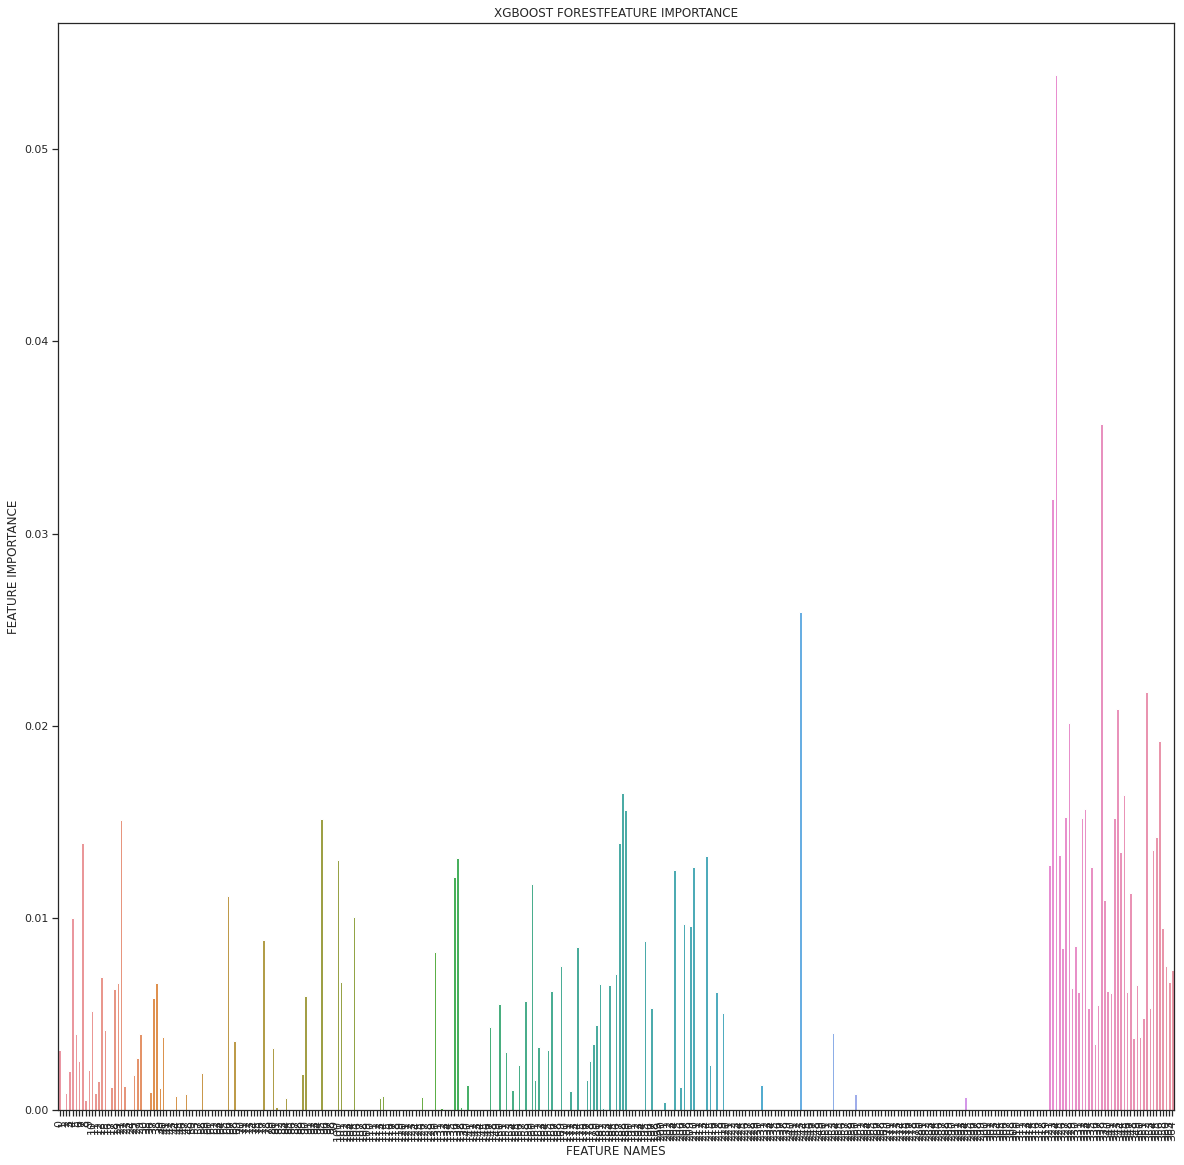

In [ ]:
plot_feature_importance(xg_reg.feature_importances_,x_train_tfidf.columns,'XGBOOST FOREST')

In [ ]:
featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00315
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00092
Feature: 3, Score: 0.00203
Feature: 4, Score: 0.01001
Feature: 5, Score: 0.00396
Feature: 6, Score: 0.00254
Feature: 7, Score: 0.01391
Feature: 8, Score: 0.00053
Feature: 9, Score: 0.00209
Feature: 10, Score: 0.00514
Feature: 11, Score: 0.00089
Feature: 12, Score: 0.00150
Feature: 13, Score: 0.00696
Feature: 14, Score: 0.00417
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00124
Feature: 17, Score: 0.00629
Feature: 18, Score: 0.00661
Feature: 19, Score: 0.01510
Feature: 20, Score: 0.00127
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00183
Feature: 24, Score: 0.00272
Feature: 25, Score: 0.00396
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00098
Feature: 29, Score: 0.00586
Feature: 30, Score: 0.00662
Feature: 31, Score: 0.00113
Feature: 32, Score: 0.00384
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_tfidf,y_pred_tfidf)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## Random Forest

In [ ]:
# hyperparameterTuning_RandomForest(x_train_tfidf,y_train_tfidf)

In [ ]:
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = rnd_clf.predict(x_test_tfidf)


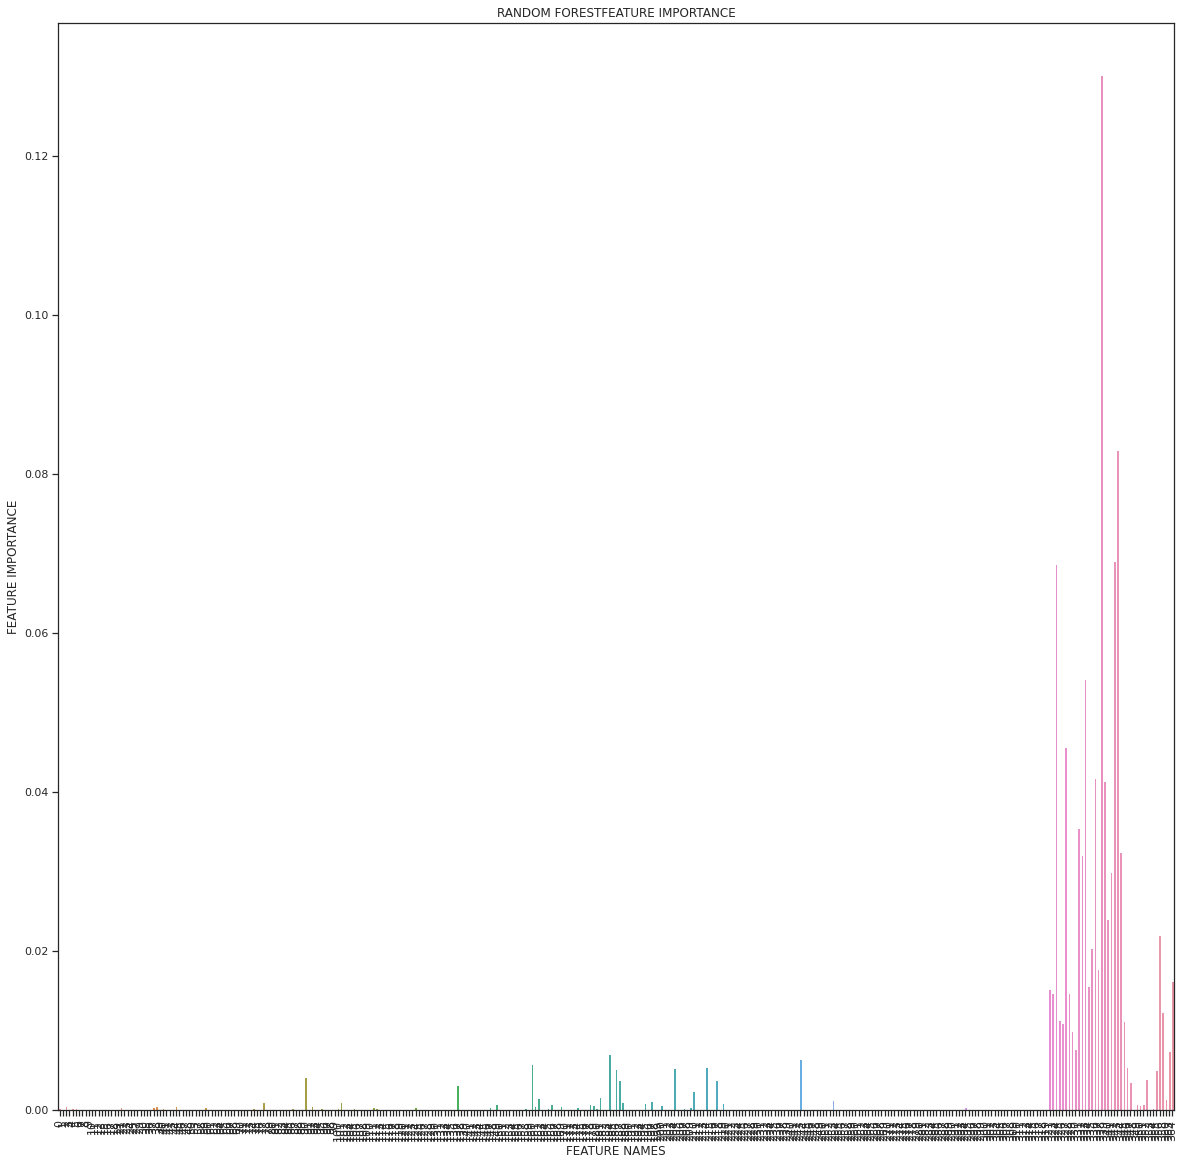

In [ ]:
plot_feature_importance(rnd_clf.feature_importances_,x_train_tfidf.columns,'RANDOM FOREST')

In [ ]:
featureScore(rnd_clf.feature_importances_)

Feature: 0, Score: 0.00029
Feature: 1, Score: 0.00015
Feature: 2, Score: 0.00049
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00026
Feature: 5, Score: 0.00027
Feature: 6, Score: 0.00009
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.00002
Feature: 9, Score: 0.00005
Feature: 10, Score: 0.00010
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.00011
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00021
Feature: 15, Score: 0.00002
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00019
Feature: 18, Score: 0.00012
Feature: 19, Score: 0.00041
Feature: 20, Score: 0.00001
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00011
Feature: 25, Score: 0.00007
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00004
Feature: 28, Score: 0.00009
Feature: 29, Score: 0.00046
Feature: 30, Score: 0.00056
Feature: 31, Score: 0.00016
Feature: 32, Score: 0.00035
Feature: 33, Score: 0.00005
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_tfidf,y_pred_tfidf)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## MLP

In [ ]:
# hyperparameterTuning_MLP(x_train_tfidf,y_train_tfidf)

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam',random_state=random_state)
mlp_GS.fit(x_train_tfidf, y_train_tfidf)
y_pred_mlp = mlp_GS.predict(x_test_tfidf)

In [ ]:

rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_tfidf,y_pred_mlp)

dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## SVM

In [ ]:
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0,random_state=random_state)
svr.fit(x_train_tfidf, y_train_tfidf)
y_pred_SVR = svr.predict(x_test_tfidf)

In [ ]:
metrics(y_test_tfidf,y_pred_SVR)

(0.013762409229186838,
 -0.05914314193546444,
 0.0032521407596789276,
 0.00018940390779160707,
 -4.285814372472848,
 0.6918461457842058)

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_tfidf,y_pred_SVR)

dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [ ]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,Lightgbm,0.008625,0.583974,0.001838,-4.753048,0.538299
1,XGboost,0.008174,0.626353,0.001510,-4.806766,0.526286
2,Random Forest,0.008484,0.597485,0.001640,-4.769556,0.533026
3,MLP,0.010117,0.427629,0.002454,-4.593528,0.641612
4,SVR,0.013762,-0.059143,0.003252,-4.285814,0.691846
